# Практическая работа 11

## Задание 1

Найти данные для кластеризации.
Внимание, если признаки в данных имеют очень сильно разные масштабы, то необходимо данные предварительно нормализовать.

В астрономии, спектральная классификация звёзд - это классификация звёзд по особенностям их спектров.
Схема классификации галактик, квазаров и звезд является одной из самых фундаментальных вещей в астрономии.

Приведенные ниже данные содержат 100 тысяч записей, полученных SDSS (Sloan Digital Sky Survey, или Слоановский цифровой небесный обзор).
Этот проект назван в честь фонда Альфреда Слоана и предназначен для широкомасштабного исследования многоспектральных изображений и спектров красного смещения звёзд и галактик при помощи 2,5-метрового широкоугольного телескопа в обсерватории Апачи-Пойнт в штате Нью-Мексико.
Каждая запись состоит из 17 различных признаков и 1 признака с данными о принадлежности записи к определенному классу: звезда, галактика или квазар.

Описание каждого параметра:
- `obj_ID` = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
- `alpha` = Right Ascension angle (at J2000 epoch)
- `delta` = Declination angle (at J2000 epoch)
- `u` = Ultraviolet filter in the photometric system
- `g` = Green filter in the photometric system
- `r` = Red filter in the photometric system
- `i` = Near Infrared filter in the photometric system
- `z` = Infrared filter in the photometric system
- `run_ID` = Run Number used to identify the specific scan
- `rereun_ID` = Rerun Number to specify how the image was processed
- `cam_col` = Camera column to identify the scanline within the run
- `field_ID` = Field number to identify each field
- `spec_obj_ID` = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same `spec_obj_ID` must share the output class)
- `class` = object class (galaxy, star or quasar object)
- `redshift` = redshift value based on the increase in wavelength
- `plate` = plate ID, identifies each plate in SDSS
- `MJD` = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
- `fiber_ID` = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

Загрузка данных:

In [1]:
import pandas as pd

data = pd.read_csv('star_classification.csv')
data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


Получим краткую сводку о данных:

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

Видно, что данные не содержат отсутствующих значений.

Получим описание данных:

In [3]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


Видно, что некоторые признаки, такие как `u`, `g` и `z`, содержат очень большие отрицательные числа (`-9999.0`), которые сильно отличаются от средних.
Минимальное значение признака `alpha` меньше среднего на порядки.
Также максимальное значение признака `redshift` примерно в 10 раз больше среднего значения по всему датасету.

Это может говорить о том, что данные содержат некоторые выбросы.

Для начала обработаем признаки с минимальными значениями, равными `-9999.0`: заменим эти значения на медианные в соответствующем признаке:

In [4]:
data.loc[data['u'] == -9999, 'u'] = data.u.median()
data.loc[data['g'] == -9999, 'g'] = data.g.median()
data.loc[data['z'] == -9999, 'z'] = data.z.median()

Далее построим коробку с усами по признаку `alpha`:

<IPython.core.display.Javascript object>


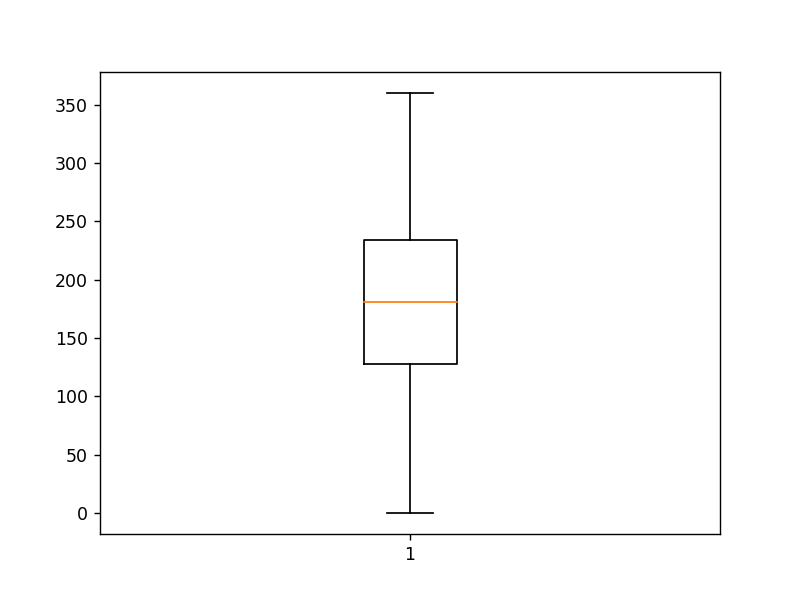

In [5]:
import matplotlib.pyplot as plt

%matplotlib notebook

plt.boxplot(data.alpha)
plt.show()

Видно, что выбросов по данному признаку нет.

Было выяснено, что науке известно множество объектов с космологическим красным смещением больше единицы. Так, галактика с наибольшим известным красным смещением на апрель 2022 года - HD1 (самая старая из известных науке галактик), у которой этот показатель составляет 13,27.

Это говорит о том, что значение параметра `redshift` (красное смещение), большее 1, с большой долей вероятности является не выбросом, а реальным значением.

Теперь снова получим описание данных:

In [6]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,22.080680,20.631588,19.645762,19.084854,18.768990,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,2.251057,2.037374,1.854760,1.757895,1.765973,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,10.996230,10.498200,9.822070,9.469903,9.612333,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352430,18.965245,18.135828,17.732285,17.460900,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179138,21.099882,20.125290,19.405145,19.004598,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


Удалим те данные, которые напрямую не относятся к спектральным характеристикам звезд, такие как идентификаторы и дата снимка:

In [7]:
data.drop(
    columns=['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID'],
    inplace=True,
)
data

,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123
...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,GALAXY,0.000000
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,GALAXY,0.404895
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,GALAXY,0.143366
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,GALAXY,0.455040


Удалим предположительно появившиеся дубликаты:

In [8]:
data.drop_duplicates(keep='first', inplace=True)
data

,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123
...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,GALAXY,0.000000
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,GALAXY,0.404895
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,GALAXY,0.143366
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,GALAXY,0.455040


Из-за разности масштаба признаков, было принято решение нормализовать все данные в датасете:

In [9]:
from sklearn import preprocessing as preprc

data.drop(columns=['class'], inplace=True)
data = pd.DataFrame(
    preprc.MinMaxScaler().fit_transform(data),
    columns=data.columns,
)
data

,alpha,delta,u,g,r,i,z,redshift
0,0.376905,0.503802,0.591347,0.558050,0.535344,0.427665,0.464377,0.091831
1,0.402286,0.491812,0.632603,0.584423,0.646203,0.515986,0.607035,0.112389
2,0.394960,0.534139,0.654888,0.576463,0.546218,0.435729,0.472194,0.093170
3,0.940947,0.180600,0.511384,0.629186,0.596946,0.486717,0.487460,0.134210
4,0.959118,0.392679,0.387463,0.335579,0.337999,0.287021,0.300043,0.017959
...,...,...,...,...,...,...,...,...
99995,0.110044,0.159072,0.512797,0.591245,0.611752,0.522045,0.562598,0.001420
99996,0.081913,0.379072,0.536831,0.563308,0.538130,0.453770,0.495813,0.059087
99997,0.623848,0.338810,0.466966,0.415644,0.424420,0.362588,0.391468,0.021839
99998,0.589629,0.642974,0.658896,0.527831,0.510982,0.423554,0.455834,0.066229


## Задание 2

Провести кластеризацию данных с помощью алгоритма k-means.
Использовать «правило локтя» и коэффициент силуэта для поиска оптимального количества кластеров.

### Подготовка к подсчету времени

In [10]:
algos = {
    'kmeans': 'Алгоритм K-средних',
    'agglom': 'Иерархическая кластеризация',
    'dbscan': 'Алгоритм DBSCAN',
}

In [11]:
times = pd.DataFrame({
    algos['kmeans']: [pd.NA],
    algos['agglom']: [pd.NA],
    algos['dbscan']: [pd.NA],
})

times.index = ['fit']
times.index.name = "Метод"

times

,Алгоритм K-средних,Иерархическая кластеризация,Алгоритм DBSCAN
Метод,,,
fit,<NA>,<NA>,<NA>


In [12]:
import time


def time_for(alg):
    def decorator(func):
        def wrapper(*args, **kwargs):
            t = time.process_time()
            result = func(*args, **kwargs)
            times.at['fit', algos[alg]] = time.process_time() - t
            return result

        return wrapper

    return decorator

Найдем оптимальное количества кластеров, применяя "правило локтя" и коэффициент силуэта.
Для начала найдем значения функции стоимости и коэффициента силуэта от числа кластеров:

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

random_state = 42
data = data[:1_000]

models = []
score1 = []
score2 = []
for n_clusters in range(2, 10):
    model = KMeans(n_clusters=n_clusters, random_state=random_state, init='k-means++').fit(data)
    models.append(model)
    score1.append(model.inertia_)
    score2.append(silhouette_score(data, model.labels_))

Построим графики зависимости функции стоимости и коэффициента силуэта от числа кластеров:

<IPython.core.display.Javascript object>


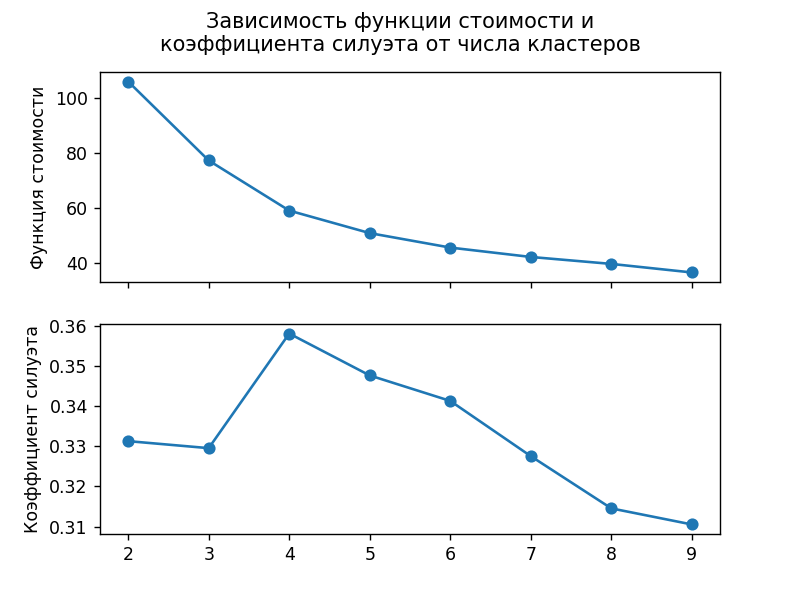

In [14]:
import numpy as np

xaxis = np.arange(2, 10)

fig, (ax1, ax2) = plt.subplots(2, sharex='all')
fig.suptitle('Зависимость функции стоимости и\nкоэффициента силуэта от числа кластеров')

ax1.plot(xaxis, score1, marker='o')
ax1.set_ylabel('Функция стоимости')
ax1.label_outer()

ax2.plot(xaxis, score2, marker='o')
ax2.set_ylabel('Коэффициент силуэта')

fig.show()

Итого, оптимальное число кластеров оказалось равным 4.

In [15]:
n_clusters = 4

Приведем результат кластеризации данных для 4 кластеров:

In [16]:
kmeans_model = KMeans(n_clusters=n_clusters, random_state=random_state, init='k-means++')

In [17]:
@time_for('kmeans')
def kmeans_fit():
    kmeans_model.fit(data)

kmeans_fit()

In [18]:
kmeans_clusters = pd.Series(kmeans_model.labels_)
kmeans_clusters.value_counts()

0    345
1    243
2    223
3    189
dtype: int64

## Задание 3

Провести кластеризацию данных с помощью алгоритма иерархической кластеризации.

In [19]:
from sklearn.cluster import AgglomerativeClustering

agglom_model = AgglomerativeClustering(n_clusters=n_clusters, compute_distances=True)

In [20]:
@time_for('agglom')
def agglom_fit():
    agglom_model.fit(data)

agglom_fit()

In [21]:
agglom_clusters = pd.Series(agglom_model.labels_)
agglom_clusters.value_counts()

0    439
2    212
1    193
3    156
dtype: int64

## Задание 4

Провести кластеризацию данных с помощью алгоритма DBSCAN.

In [22]:
min_samples = data.shape[1] * 2
min_samples

16

In [23]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=min_samples).fit(data)

distances, indices = nbrs.kneighbors(data)
distances = sorted(distances[:, 1])

<IPython.core.display.Javascript object>


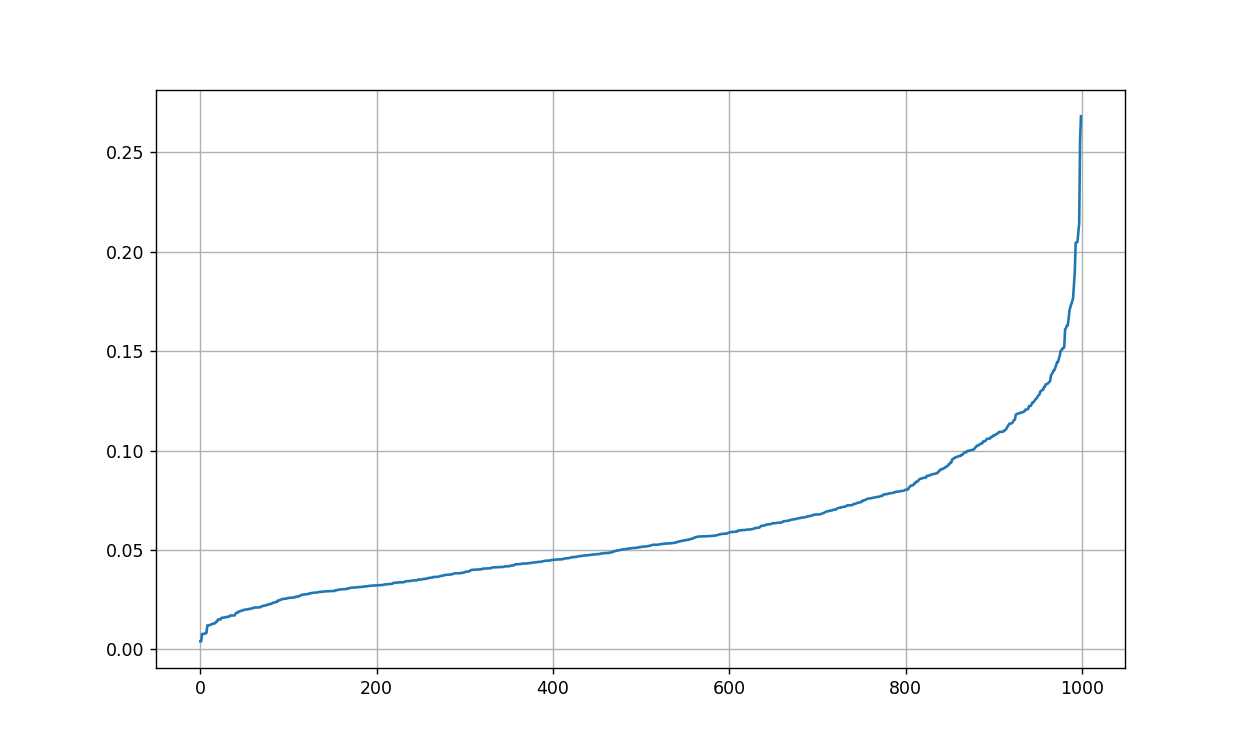

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.grid()
ax.plot(distances)
fig.show()

<IPython.core.display.Javascript object>


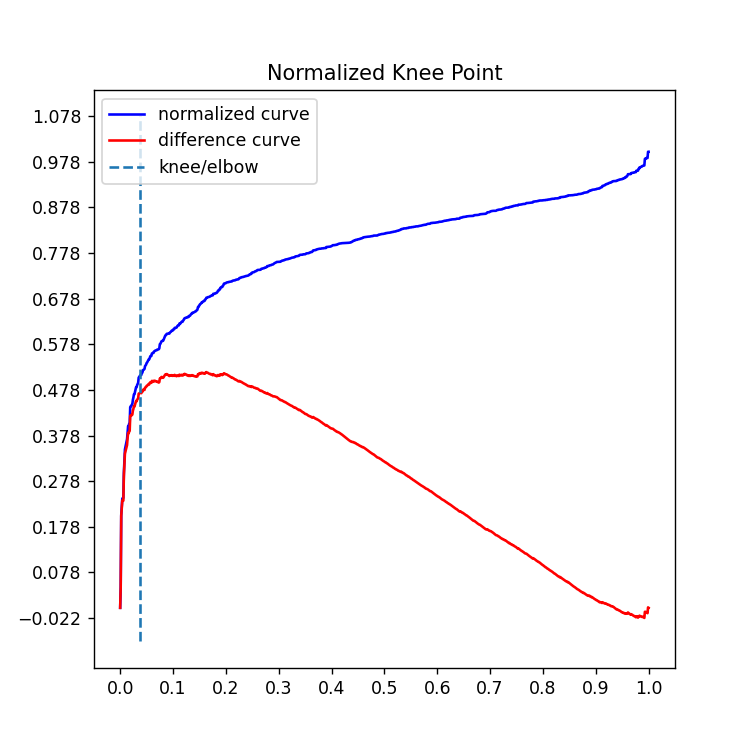

0.1334701735058526

In [25]:
from kneed import KneeLocator

kneedle = KneeLocator(
    x=range(1, len(distances) + 1),
    y=distances, S=1.0, curve='convex')
kneedle.plot_knee_normalized()

eps = kneedle.knee_y
eps

In [26]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)

In [27]:
@time_for('dbscan')
def dbscan_fit():
    dbscan_model.fit(data)

dbscan_fit()

In [28]:
dbscan_clusters = pd.Series(dbscan_model.labels_)
dbscan_clusters.value_counts()

 0    414
-1    223
 2    183
 1    124
 4     28
 5     15
 3     13
dtype: int64

## Задание 5

Сравнить скорость работы алгоритмов. Результаты изобразить в виде таблицы.

In [29]:
times

,Алгоритм K-средних,Иерархическая кластеризация,Алгоритм DBSCAN
Метод,,,
fit,0.421875,0.03125,0.03125


## Задание 6

Визуализировать кластеризованные данные с помощью t-SNE или UMAP, если данные многомерные.
Если данные трехмерные, то можно использовать трехмерный точечный график.

In [30]:
from umap import UMAP
from typing import Iterable


def draw_umap(clusters: Iterable):
    n_neighbors = [5, 25, 50]
    min_dists = [0.1, 0.6]
    for neighbor in n_neighbors:
        fig = plt.figure()
        fig.suptitle(f'Результаты UMAP с n_neighbors={neighbor}')
        axs = fig.subplots(1, 2, subplot_kw=dict(projection='3d'))
        for ax, min_dist in zip(axs.flat, min_dists):
            umap = UMAP(n_neighbors=neighbor, n_components=3, min_dist=min_dist, random_state=random_state)
            result = pd.DataFrame(umap.fit_transform(data))
            args = [result.iloc[:, i] for i in range(3)]
            ax.scatter(*args, c=clusters, cmap='coolwarm', alpha=0.5)
            ax.set_title(f'min_dist={min_dist}')
            ax.set_axisbelow(True)
            ax.grid(axis='both')
        fig.show()

<IPython.core.display.Javascript object>


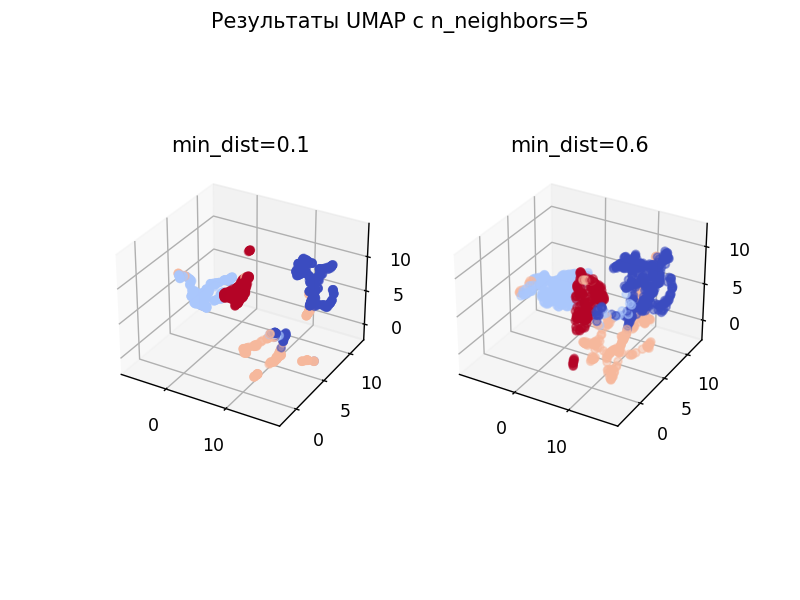

<IPython.core.display.Javascript object>


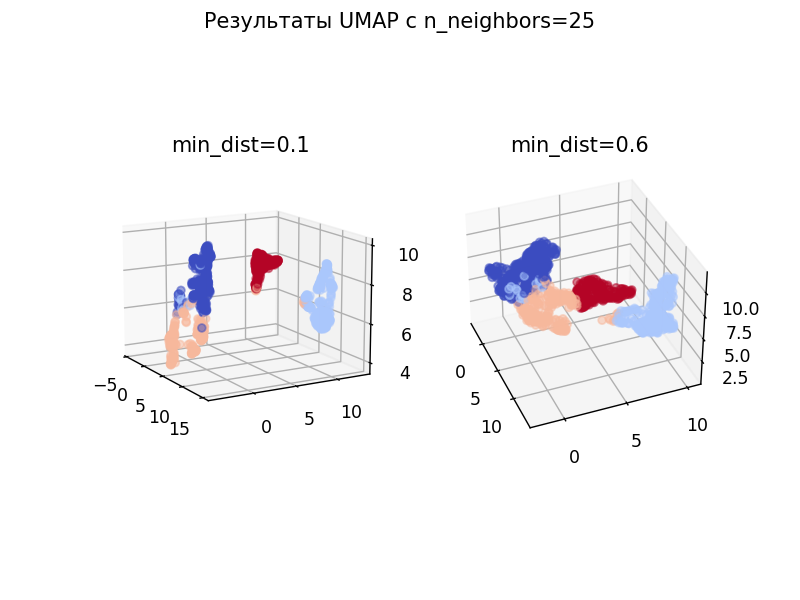

<IPython.core.display.Javascript object>


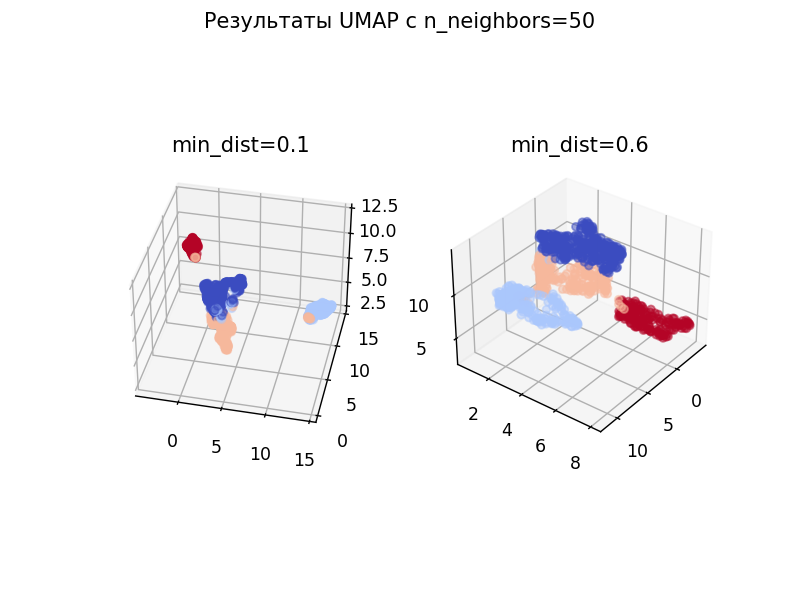

In [31]:
draw_umap(kmeans_clusters)

<IPython.core.display.Javascript object>


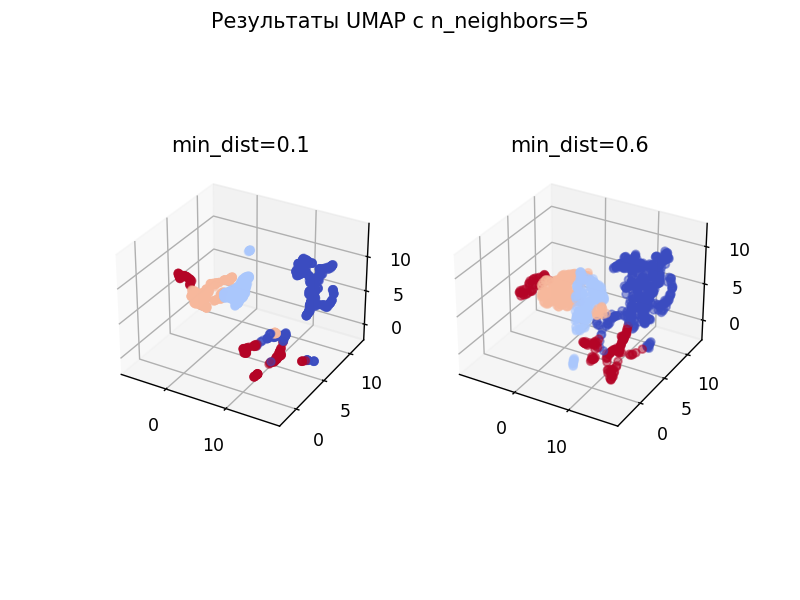

<IPython.core.display.Javascript object>


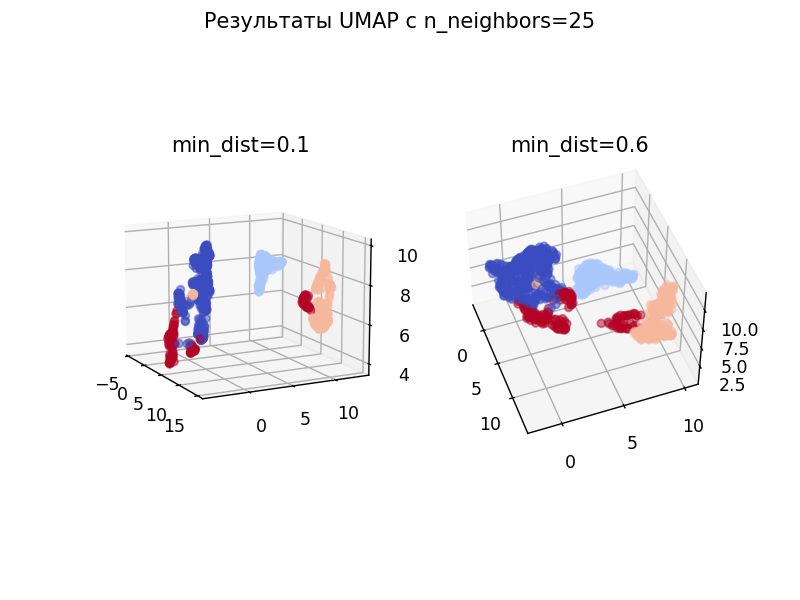

<IPython.core.display.Javascript object>


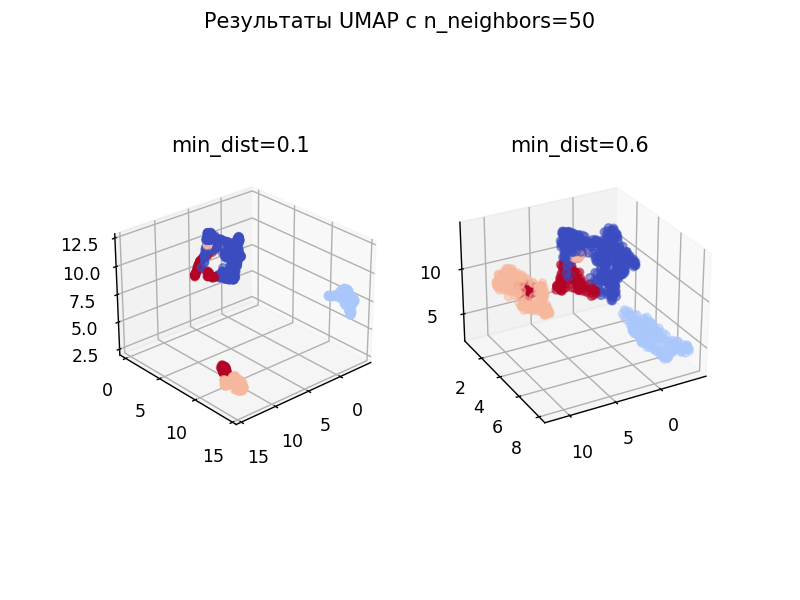

In [32]:
draw_umap(agglom_clusters)

<IPython.core.display.Javascript object>


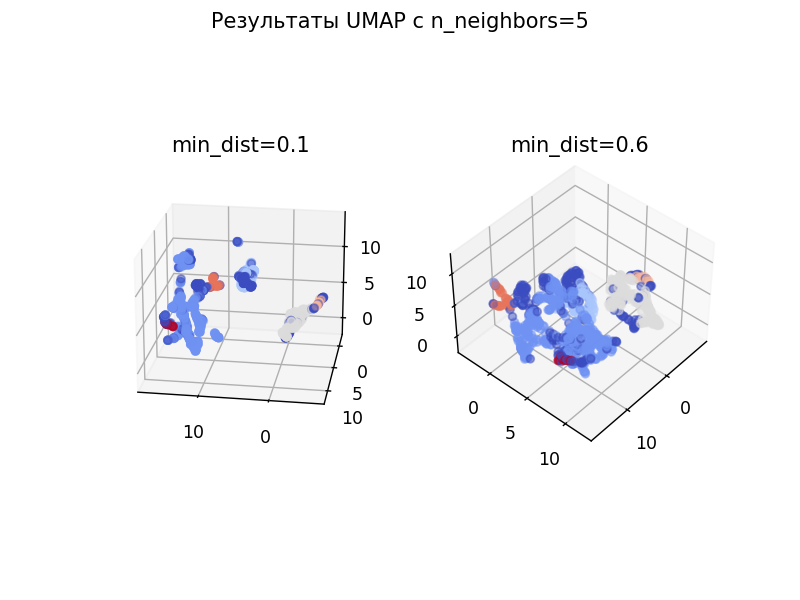

<IPython.core.display.Javascript object>


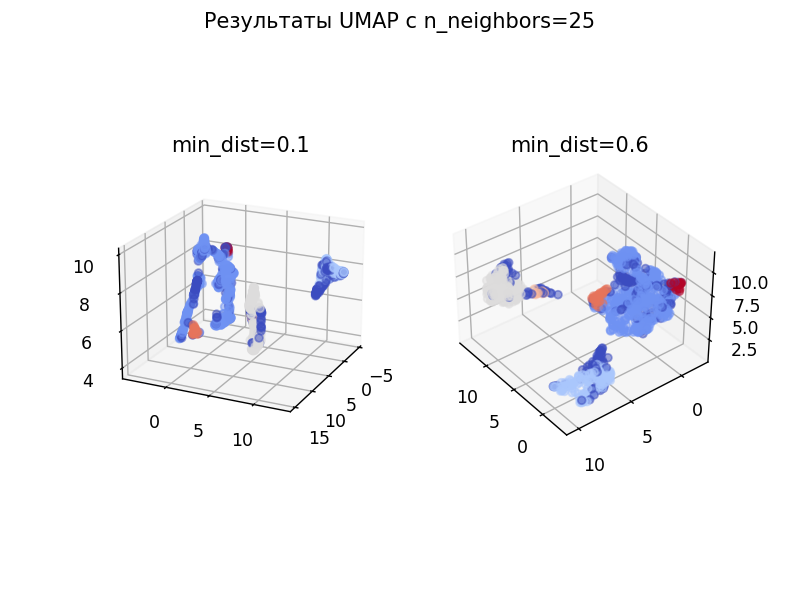

<IPython.core.display.Javascript object>


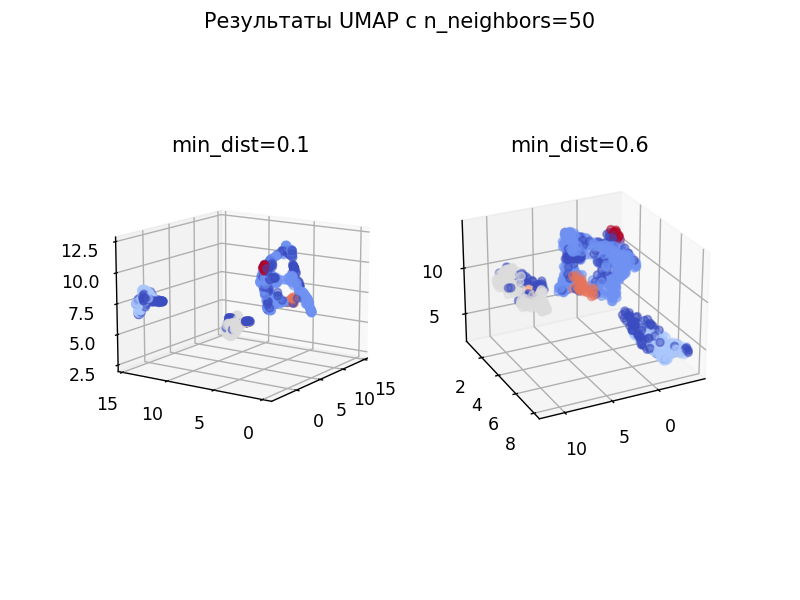

In [33]:
draw_umap(dbscan_clusters)